In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
import warnings
warnings.filterwarnings('ignore')

## Visualizing the Pedestrian Count Dataset

In [ ]:
ped_count = pd.read_csv("/content/drive/MyDrive/Retail Store Location Optimization/PedCountLocationsMay2015.csv")

In [ ]:
ped_count.columns

Index(['the_geom', 'OBJECTID', 'LOC', 'Borough', 'Street_Nam', 'From_Stree',
       'To_Street', 'Index', 'May07_AM', 'May07_PM',
       ...
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object', length=114)

In [ ]:
ped_count = ped_count[ped_count['Oct22_AM'] != 'ND']
ped_count = ped_count[ped_count['Oct22_PM'] != 'ND']
ped_count = ped_count[ped_count['Oct22_Md'] != 'ND']

In [ ]:
ped_count["Oct22_AM"] = ped_count["Oct22_AM"].astype(int)
ped_count["Oct22_PM"] = ped_count["Oct22_PM"].astype(int)
ped_count["Oct22_MD"] = ped_count["Oct22_MD"].astype(int)

In [ ]:
## Creating Yearwise distributiion of the Pedestrian Count
ped_count["2007"] = (ped_count["May07_AM"] + ped_count["May07_PM"] + ped_count["May07_MD"] + ped_count["Sept07_AM"] + ped_count["Sept07_PM"] + ped_count["Sept07_MD"])
ped_count["2008"] = (ped_count["May08_AM"] + ped_count["May08_PM"] + ped_count["May08_MD"] + ped_count["Sept08_AM"] + ped_count["Sept08_PM"] + ped_count["Sept08_MD"])
ped_count["2009"] = (ped_count["May09_AM"] + ped_count["May09_PM"] + ped_count["May09_MD"] + ped_count["Sept09_AM"] + ped_count["Sept09_PM"] + ped_count["Sept09_MD"])
ped_count["2010"] = (ped_count["May10_AM"] + ped_count["May10_PM"] + ped_count["May10_MD"] + ped_count["Sept10_AM"] + ped_count["Sept10_PM"] + ped_count["Sept10_MD"])
ped_count["2011"] = (ped_count["May11_AM"] + ped_count["May11_PM"] + ped_count["May11_MD"] + ped_count["Sept11_AM"] + ped_count["Sept11_PM"] + ped_count["Sept11_MD"])
ped_count["2012"] = (ped_count["May12_AM"] + ped_count["May12_PM"] + ped_count["May12_MD"] + ped_count["Sept12_AM"] + ped_count["Sept12_PM"] + ped_count["Sept12_MD"])
ped_count["2013"] = (ped_count["May13_AM"] + ped_count["May13_PM"] + ped_count["May13_MD"] + ped_count["Sept13_AM"] + ped_count["Sept13_PM"] + ped_count["Sept13_MD"])
ped_count["2014"] = (ped_count["May14_AM"] + ped_count["May14_PM"] + ped_count["May14_MD"] + ped_count["Sept14_AM"] + ped_count["Sept14_PM"] + ped_count["Sept14_MD"])
ped_count["2015"] = (ped_count["May15_AM"] + ped_count["May15_PM"] + ped_count["May15_MD"] + ped_count["Sept15_AM"] + ped_count["Sept15_PM"] + ped_count["Sept15_MD"])
ped_count["2016"] = (ped_count["May16_AM"] + ped_count["May16_PM"] + ped_count["May16_MD"] + ped_count["Sept16_AM"] + ped_count["Sept16_PM"] + ped_count["Sept16_MD"])
ped_count["2017"] = (ped_count["May17_AM"] + ped_count["May17_PM"] + ped_count["May17_MD"] + ped_count["Sept17_AM"] + ped_count["Sept17_PM"] + ped_count["Sept17_MD"])
ped_count["2018"] = (ped_count["May18_AM"] + ped_count["May18_PM"] + ped_count["May18_MD"] + ped_count["Sept18_AM"] + ped_count["Sept18_PM"] + ped_count["Sept18_MD"])
ped_count["2019"] = (ped_count["May19_AM"] + ped_count["May19_PM"] + ped_count["May19_MD"])
ped_count["2020"] = ped_count["Oct20_AM"] + ped_count["Oct20_PM"] + ped_count["Oct20_MD"]
ped_count["2021"] = (ped_count["May21_AM"] + ped_count["May21_PM"] + ped_count["May21_MD"] + ped_count["Oct21_AM"] + ped_count["Oct21_PM"] + ped_count["Oct21_MD"])
ped_count["2022"] = ped_count["May22_AM"] + ped_count["May22_pM"] + ped_count["May22_MD"] + ped_count["Oct22_AM"] + ped_count["Oct22_PM"] + ped_count["Oct22_MD"]


In [ ]:
new_df = ped_count.loc[:,['Street_Nam','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2020', '2021', '2022']]

In [ ]:
street_column = 'Street_Nam'

# Select the columns you want for the plot
years_columns = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2020', '2021', '2022']

# Assuming you want the 10 best street names based on some criteria (you may need to adjust this)
top_street_names = new_df.groupby(street_column).sum().sum(axis=1).sort_values(ascending=False).head(10).index

# Combine rows with the same street name by summing their values for each year
df_combined = new_df.groupby(street_column)[years_columns].sum().reset_index()

# Filter the DataFrame to include only the top street names
df_top_streets = df_combined[df_combined[street_column].isin(top_street_names)]


In [ ]:
top_street_names = top_street_names[1:]

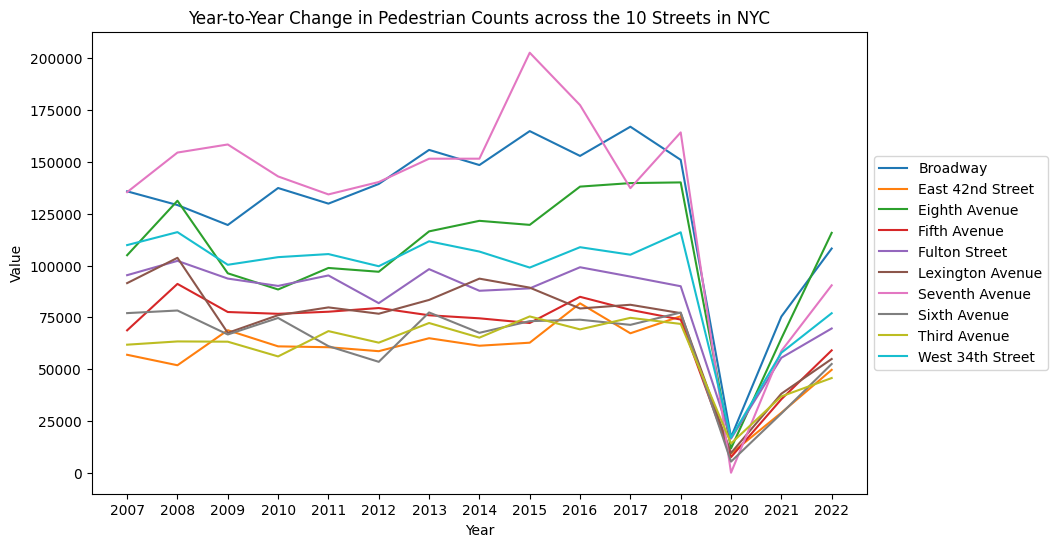

In [ ]:
plt.figure(figsize=(10, 6))
for index, row in df_top_streets.iterrows():
    street_name = row[street_column]
    plt.plot(years_columns, row[years_columns], label=street_name)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Year-to-Year Change in Pedestrian Counts across the 10 Streets in NYC')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Visualizing the Storefront Dataset

In [ ]:
storefront_df = pd.read_csv("/content/drive/MyDrive/Retail Store Location Optimization/updated_storefront.csv")


<ipython-input-129-84265bd23c65>:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  storefront_df = pd.read_csv("/content/drive/MyDrive/Retail Store Location Optimization/updated_storefront.csv")


In [ ]:
storefront_df['Street']

0        BROAD STREET
1        BROAD STREET
2        BROAD STREET
3        BROAD STREET
4        BROAD STREET
             ...     
61498     MAIN STREET
61499     MAIN STREET
61500     MAIN STREET
61501     MAIN STREET
61502     MAIN STREET
Name: Street, Length: 61503, dtype: object

In [ ]:
storefront_df.rename(columns={'PROPERTY STREET': 'Street'}, inplace=True)

In [ ]:
useful_columns=['Street', 'VACANT ON 12/31']
storefront_df = storefront_df[useful_columns]

In [ ]:
result = storefront_df.groupby(['Street', 'VACANT ON 12/31']).size().unstack(fill_value=0)

In [ ]:
result = result.rename(columns = {"YES" : "Num_Vacant_Stores", "NO" : "Num_Occupied_Stores"})

In [ ]:
result = result.reset_index()

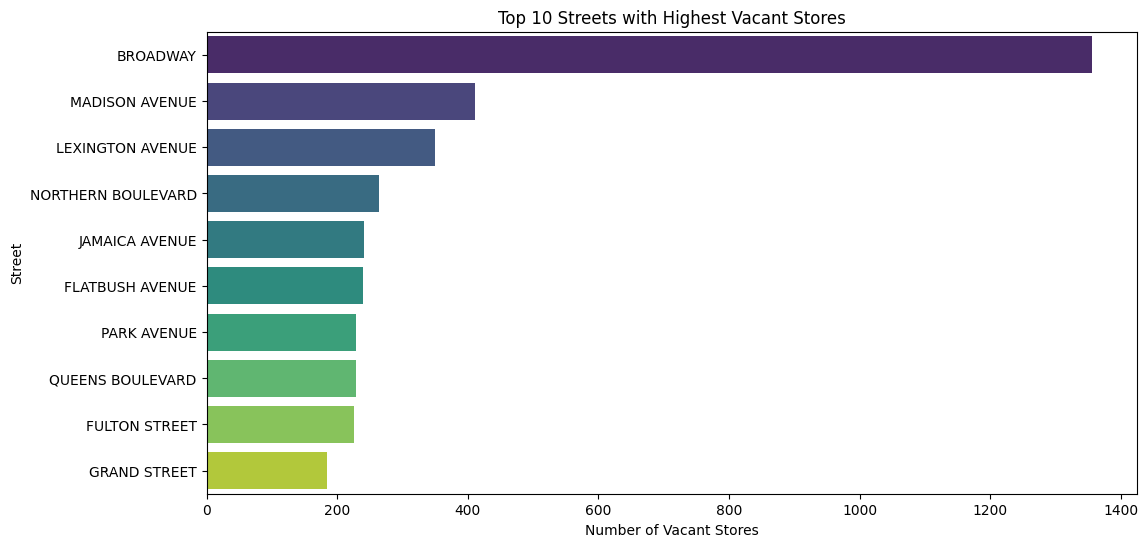

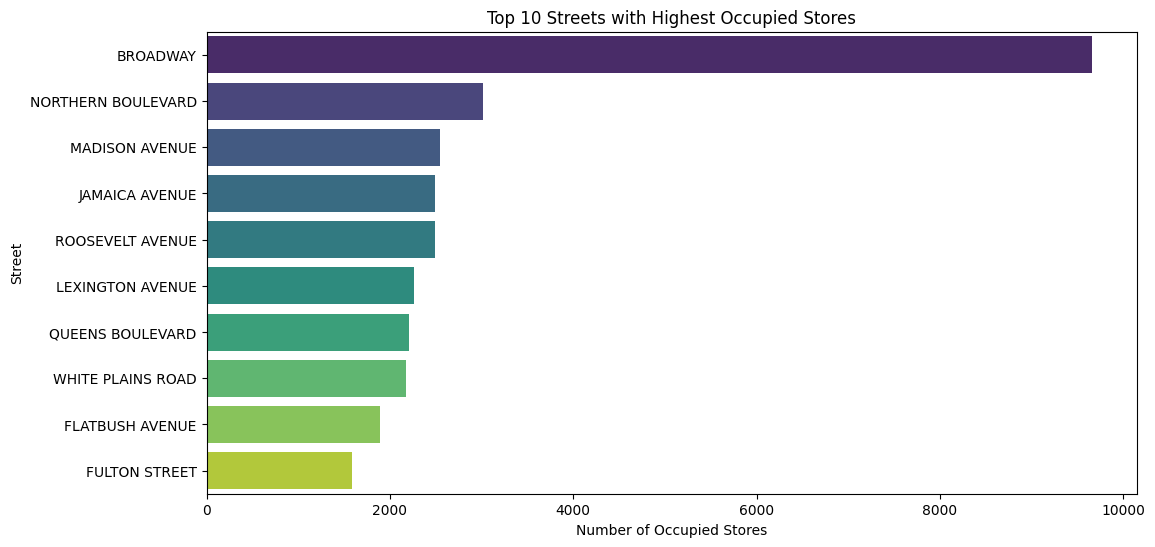

In [ ]:
top_vacant_streets = result.sort_values(by='Num_Vacant_Stores', ascending=False).head(10)

# Sorting by the number of occupied stores
top_occupied_streets = result.sort_values(by='Num_Occupied_Stores', ascending=False).head(10)

# Plotting the top 10 streets with the highest vacant stores
plt.figure(figsize=(12, 6))
sns.barplot(x='Num_Vacant_Stores', y='Street', data=top_vacant_streets, palette='viridis')
plt.title('Top 10 Streets with Highest Vacant Stores')
plt.xlabel('Number of Vacant Stores')
plt.ylabel('Street')
plt.show()

# Plotting the top 10 streets with the highest occupied stores
plt.figure(figsize=(12, 6))
sns.barplot(x='Num_Occupied_Stores', y='Street', data=top_occupied_streets, palette='viridis')
plt.title('Top 10 Streets with Highest Occupied Stores')
plt.xlabel('Number of Occupied Stores')
plt.ylabel('Street')
plt.show()

# Creating a new column for the ratio of vacant to occupied stores
result['Vacant_to_Occupied_Ratio'] = result['Num_Vacant_Stores'] / result['Num_Occupied_Stores']


# Visualizing Retail Food Stores

In [3]:
retail_food_store_df = pd.read_csv("/content/drive/MyDrive/Retail Store Location Optimization/Retail_Food_Stores.csv")
retail_food_store_df.head(5)

,County,License Number,Operation Type,Establishment Type,Entity Name,DBA Name,Street Number,Street Name,Address Line 2,Address Line 3,City,State,Zip Code,Square Footage,Georeference
0,Albany,756115,Store,JAC,HILLBELLYS LLC,HILLBELLY'S,585,STATE RT 143,NaN,NaN,WESTERLO,NY,12193,2000,POINT (-74.04433 42.515)
1,Albany,755848,Store,A,LUCKY QUICK MART INC,LUCKY QUICK MART,52,FULLER RD,NaN,NaN,ALBANY,NY,12205,0,POINT (-73.82119 42.70018)
2,Albany,755625,Store,JAC,LUKES MEGA MART INC,LUKE'S MEGA MART,438,CENTRAL AVE,NaN,NaN,ALBANY,NY,12206,0,POINT (-73.77714 42.66827)
3,Albany,755606,Store,A,2428392 INC,FYE #1677,120,WASHINGTON AVE EX C109,NaN,NaN,ALBANY,NY,12203,0,POINT (-73.84802 42.69191)
4,Albany,755543,Store,JAC,AMIGOS CORNER STORE LLC,AMIGOS CORNER STORE,16,JUDSON ST,NaN,NaN,ALBANY,NY,12206,1200,POINT (-73.76578 42.66436)


In [4]:
top_establishment_type = retail_food_store_df.groupby(['County', 'Establishment Type']).size().groupby(level=0, group_keys=False).nlargest(5).reset_index(name='Count')
top_entity_name = retail_food_store_df.groupby(['County', 'Entity Name']).size().groupby(level=0, group_keys=False).nlargest(5).reset_index(name='Count')
top_street_name = retail_food_store_df.groupby(['County', 'Street Name']).size().groupby(level=0, group_keys=False).nlargest(5).reset_index(name='Count')

In [5]:
counties = retail_food_store_df['County'].unique().tolist()
m = folium.Map(location=[40.7128, -74.0060], zoom_start=10)
geolocator = Nominatim(user_agent="ny_counties")
for county in counties:
  location = geolocator.geocode(county + ", New York, USA")
  if location:
    tooltip = f"<strong>{county}</strong><br>"

    top_establishment_data = top_establishment_type[top_establishment_type['County'] == county]
    top_entity_data = top_entity_name[top_entity_name['County'] == county]
    top_street_data = top_street_name[top_street_name['County'] == county]

    tooltip += "<br><strong>Top Five Establishment Types</strong><br>"
    if not top_establishment_data.empty:
      for index, row in top_establishment_data.iterrows():
        tooltip += f"{row['Establishment Type']} : {row['Count']}<br>"

    tooltip += "<br><strong>Top Five Entity Names</strong><br>"
    if not top_entity_data.empty:
      for index, row in top_entity_data.iterrows():
        tooltip += f"{row['Entity Name']} : {row['Count']}<br>"

    tooltip += "<br><strong>Top Five Street Names</strong><br>"
    if not top_street_data.empty:
      for index, row in top_street_data.iterrows():
        tooltip += f"{row['Street Name']} : {row['Count']}<br>"
    folium.Marker(
          location=[location.latitude, location.longitude],
          tooltip=tooltip
        ).add_to(m)
m